# Nombre: Jorge Luis Tapia Peñaloza
# N Cuenta: A01793013
# Materia: Ciencia y analítica de datos (Gpo 10)
# Profesor: María de la Paz Rico Fernández
# Fecha: 09-11-22

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 11.3 MB/s 
     |████████████████████████████████| 1.0 MB 51.8 MB/s 
     |████████████████████████████████| 1.7 MB 42.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 62.2 MB/s 
     |████████████████████████████████| 6.3 MB 50.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=18093138af0f29d555c002e836d2df24511e49d5f6118a5fe94540f9f78d917e
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=d91a429e8390c7047669e855e4ba4b9103cca0ce737d5341569dca4d48c69b38
  Stored in directory: /root/

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

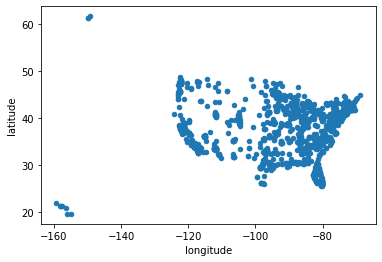

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

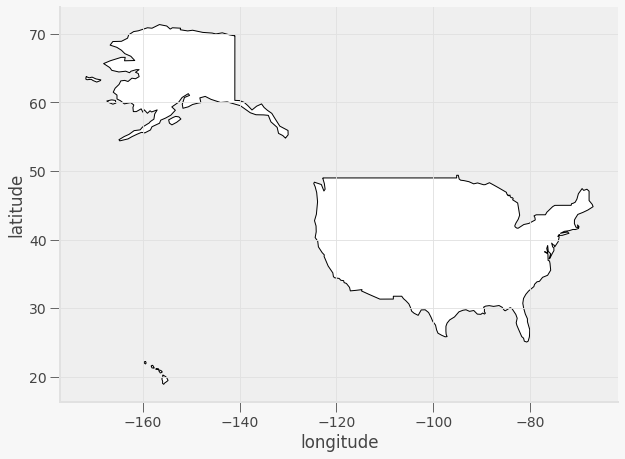

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

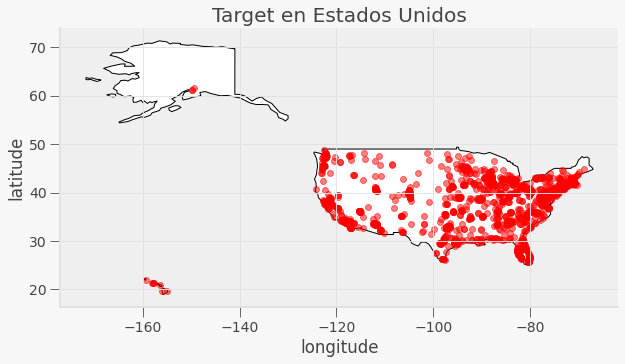

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [ ]:
!pip install kneed

In [29]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from kneed import KneeLocator


In [30]:
preprocessor = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components=2, random_state=42)),])

In [19]:
n_clusters = 1

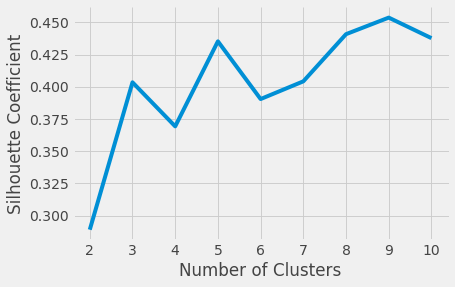

In [31]:

silhouette_coefficients = []

for k in range(2, 11):
    clusterer = Pipeline(   [("kmeans",KMeans( n_clusters = k, init="k-means++", 
                                          n_init=50, max_iter=500, random_state=42, ),),])
    
    pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
    
    pipe.fit(latlong)
    score = silhouette_score(latlong, pipe["clusterer"]["kmeans"].labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [41]:
n_cluster_Silhouette = np.argmax(silhouette_coefficients)+2

In [42]:
n_cluster_Silhouette

9

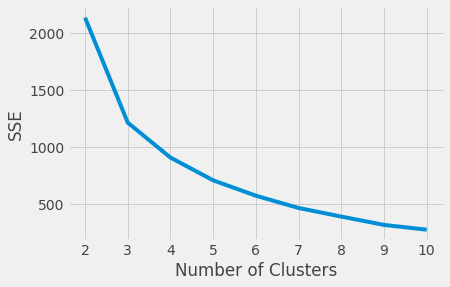

In [33]:

sse = []
for k in range(2, 11):
    clusterer = Pipeline(   [("kmeans", KMeans( n_clusters = k, init="k-means++", 
                                          n_init=50, max_iter=500, random_state=42, ),),])
    
    pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
    
    pipe.fit(latlong)
    sse.append(pipe["clusterer"]["kmeans"].inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [35]:
kl = KneeLocator(range(2, 11), sse, curve="convex", direction="decreasing")

n_cluster_elbow = kl.elbow

4

In [97]:
clusterer = Pipeline(   [("kmeans",KMeans( n_clusters = n_cluster_Silhouette+3, init="k-means++", 
                                      n_init=50, max_iter=500, random_state=42, ),),])

pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [98]:
pipe.fit(latlong)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=12, n_init=50,
                                         random_state=42))]))])

In [99]:
centroids = preprocessor.inverse_transform(pipe["clusterer"]["kmeans"].cluster_centers_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


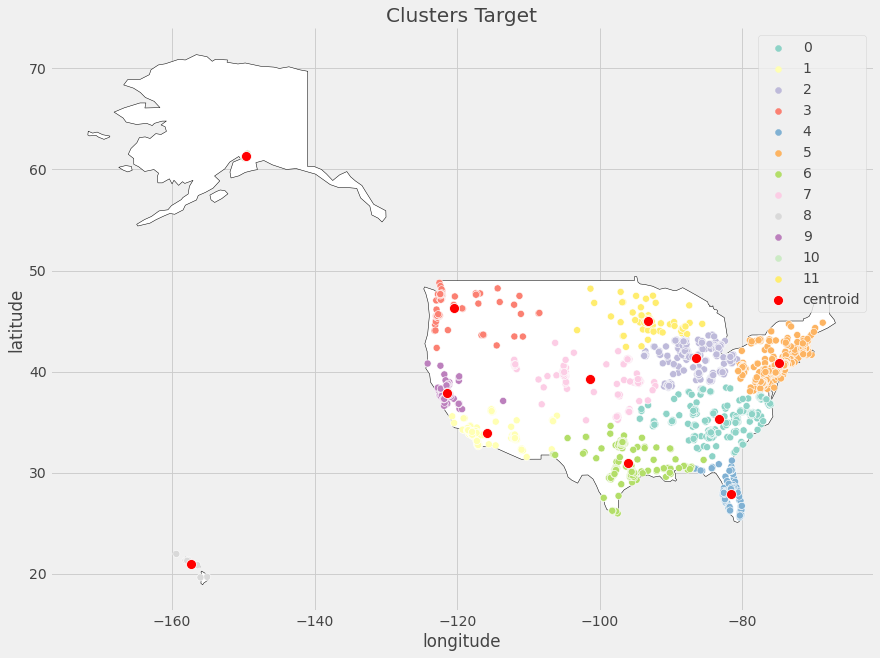

In [149]:
df_to_plot = latlong.copy()
df_to_plot["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_



fig, gax = plt.subplots(figsize=(20,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

scat = sns.scatterplot(
    "longitude",
    "latitude",
    s=50,
    data=df_to_plot,
    hue="predicted_cluster",
    palette="Set3",
)
sns.scatterplot(x = centroids[:,1],y  =centroids[:,0],color = "red" , s  = 100, label =  "centroid",)
scat.set_title("Clusters Target")
fig.show()

* Encuentra las latitudes y longitudes de los almacenes  y ¿De qué ciudad son?


In [157]:
def distance_centroid(coordinates,cl):
  centroid = centroids[cl]
  distance = coordinates.distance(Point(centroid[::-1]))
  return distance

In [136]:
def get_nearest_city(centroid):
  idx_min = gdf.drop_duplicates(subset = "name")["Coordinates"].distance(Point(centroid[::-1])).idxmin()
  return gdf.loc[idx_min, "name"]

In [150]:
city = {}
for cl,centroid in enumerate(centroids):
  city[cl] = get_nearest_city(centroid)
  print(cl,centroid, city[cl])

0 [ 35.31722162 -83.35410753] Maryville
1 [  33.94249438 -115.76528117] La Quinta
2 [ 41.36552421 -86.52482668] South Bend
3 [  46.30773633 -120.38807072] Yakima
4 [ 27.89133799 -81.5747854 ] NE Polk County
5 [ 40.80868017 -74.94417454] Washington Twp
6 [ 30.94575314 -96.11668259] Bryan
7 [  39.24045722 -101.34719791] Garden City
8 [  20.94542771 -157.31225085] Oahu Kailua
9 [  37.89556464 -121.42512336] Tracy
10 [  61.31264473 -149.6767927 ] Anchorage NE
11 [ 45.00169656 -93.19208901] Roseville T1


* ¿a cuantas tiendas va surtir?, 

In [143]:
df_to_plot["city"] = df_to_plot["predicted_cluster"].map(city)

In [146]:
df_to_plot["city"].value_counts()

Washington Twp    403
South Bend        304
Maryville         238
La Quinta         193
Bryan             183
Garden City       125
NE Polk County    124
Roseville T1      101
Tracy              80
Yakima             77
Oahu Kailua         8
Anchorage NE        3
Name: city, dtype: int64

* ¿sabes a que distancia estará?

In [156]:
gdf["cl"] = df_to_plot["predicted_cluster"]

In [160]:
gdf["distance_to_warehouse"] = gdf[["cl","Coordinates"]].apply(lambda x: distance_centroid(x["Coordinates"],x["cl"],),axis = 1)

In [162]:
gdf.groupby("cl")["distance_to_warehouse"].describe().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
cl,,,,,,,,
0,238.000000,4.057730,2.357601,0.771414,2.185416,3.613559,5.307158,11.033432
1,193.000000,2.909975,1.659529,0.574890,1.954455,2.328497,3.534063,9.898374
2,304.000000,2.900251,1.488711,0.394972,1.615373,2.834050,3.837987,7.257057
3,77.000000,3.408996,2.370543,0.315627,2.289746,2.457034,3.317322,11.926452
4,124.000000,1.692340,1.010157,0.349140,0.938033,1.396271,2.297951,5.674673
5,403.000000,2.464333,1.481423,0.119576,1.020619,2.294764,3.645336,7.397983
6,183.000000,3.091857,2.299838,0.347436,1.705094,2.164543,3.731741,10.675067
7,125.000000,5.689275,2.275167,1.357382,3.760872,5.483990,6.686163,10.833429
8,8.000000,1.305184,0.804091,0.617575,0.714378,0.863671,1.958687,2.573167


* ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
El numero de almacenes esta basado en la metrica de silueta ya que si usabamos el numero que nos propone el metodo de la inercia quedaria muy corto por la cantidad de tiendas que existen. Por esta razón opte por seleccionar esa metrica. Sin embargo al verlo graficamente el algoritmo seguia sin crear un cluster en el estado de Alaska que por su forma y lejania era imposible asignarle uno fuera de su estado. Por lo tanto se incremento el número de clusters hasta 12

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
Geo pandas, shapely, seaborn ( o alguna libreria de visualización), 
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Es importante porque al no conocer la zona geografica nos puede acarrear conclusiones equivocadas y siempre es importante tener en mente toda la información